In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps
import tifffile as tf

In [2]:
data_src = r"E:\data\my data\Arrhythmic imaging February 2024 2\0.5gramsperlitre\Allied Vision Technologies GS650 0001f61c\*tif"

In [3]:
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(data_src)
#oog.sequence_manager.set_reference_sequence_by_indices([876 ,1060])
oog.run()
print(oog.sequence_manager.reference_indices)

print(np.mean(oog.delta_phases))

Setting source to E:\data\my data\Arrhythmic imaging February 2024 2\0.5gramsperlitre\Allied Vision Technologies GS650 0001f61c\*tif
Getting reference sequence
Reference period: 79.44117647058823; Reference indices: [115, 199]
Getting SADs
Getting phases
[115, 199]
0.0012007247349779847


(-0.25, 0.25)

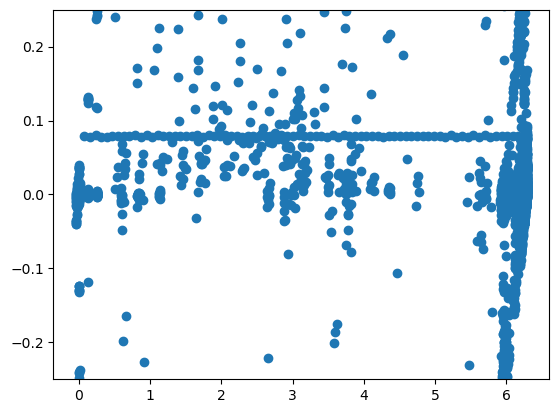

In [4]:
plt.scatter(oog.phases[1::],oog.delta_phases)
plt.ylim(-0.25,0.25)

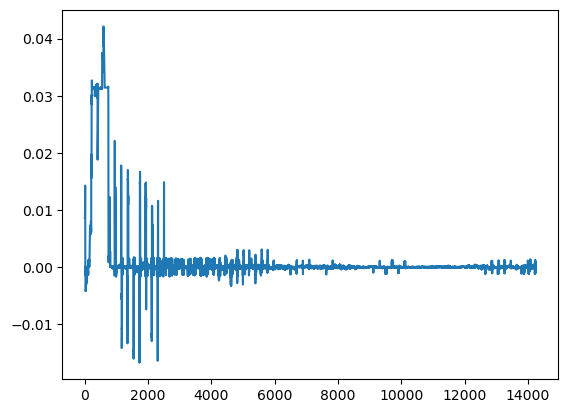

In [5]:
# Plot moving average of delta phases
plt.plot(np.convolve(oog.delta_phases, np.ones(200)/200, mode='valid'))
plt.show()

[   45   194   366   563   623   752   803   944  1008  1144  1348  1401
  1537  1624  1727  1779  1850  1916  2113  2233  2304  2491  2570  2632
  2683  2934  3044  3133  3184  3316  3384  3448  3500  3563  3700  3768
  3842  3897  3951  4046  4130  4223  4288  4356  4413  4467  4560  4614
  4665  4718  4785  4922  4990  5059  5147  5217  5327  5378  5488  5559
  5648  5786  5871  5944  5995  6076  6131  6189  6301  6370  6434  6550
  6617  6688  6748  6864  6931  7000  7064  7132  7198  7268  7331  7382
  7449  7512  7582  7676  7743  7806  7856  7945  8036  8104  8182  8235
  8300  8373  8443  8531  8623  8690  8763  8823  8895  8956  9024  9076
  9141  9232  9282  9339  9411  9597  9676  9727  9795  9924 10000 10175
 10246 10321 10378 10446 10507 10561 10624 10693 10759 10830 10881 10941
 11031 11150 11211 11327 11396 11460 11530 11598 11668 11732 11799 11849
 11917 12026 12115 12167 12234 12298 12364 12432 12482 12540 12615 12680
 12766 12817 12882 12932 13001 13090 13140 13230 13

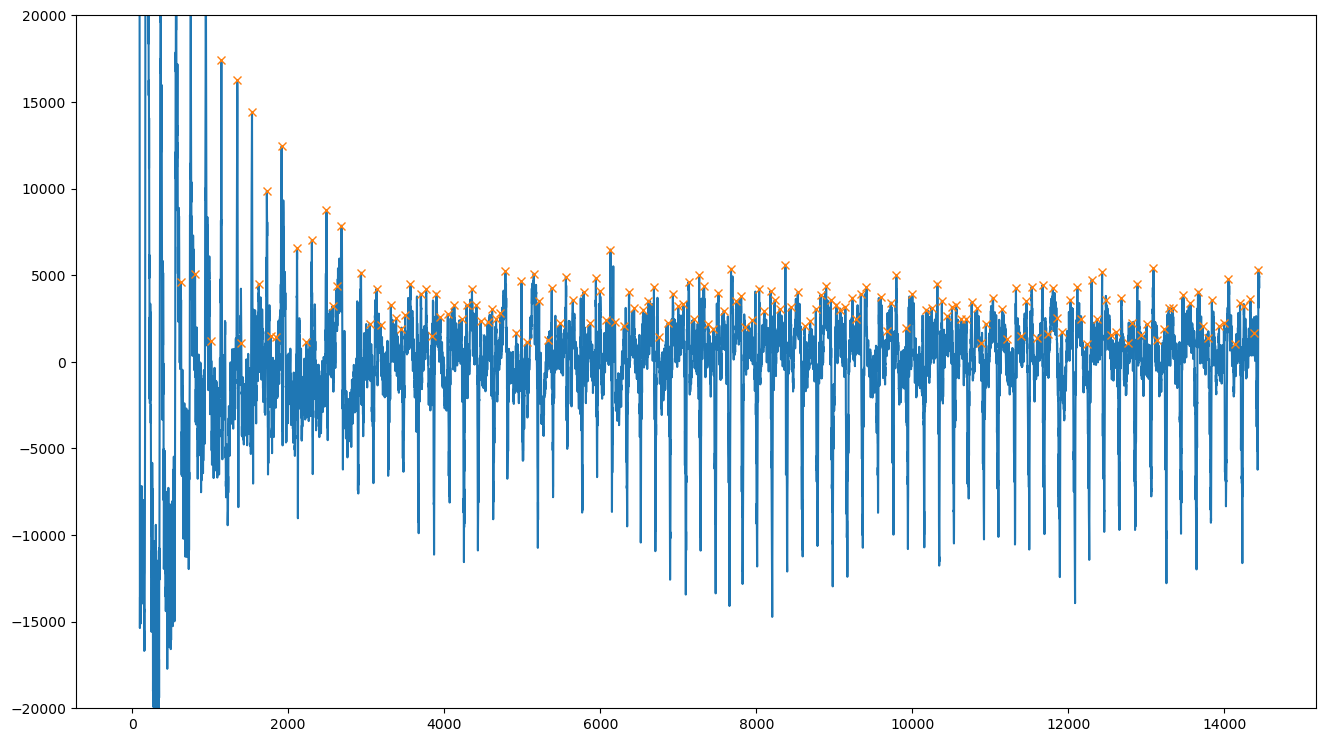

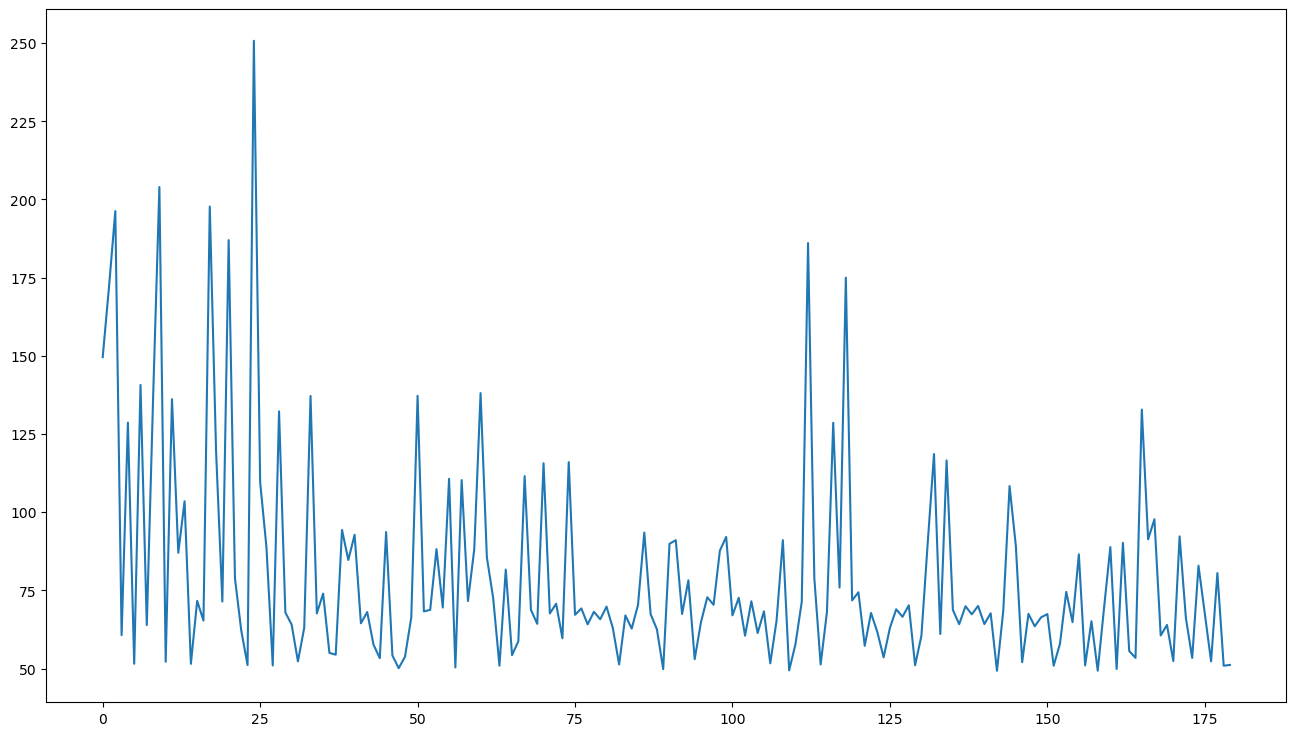

In [7]:
def get_hr_over_time(data_src):
    data = OG.SequenceManager.load_tif(data_src)
    diffs = jps.sad_with_references(data[0], data)
    diffs = -diffs
    diffs -= np.min(diffs)

    # Denoise diffs with a moving average
    #diffs = np.convolve(diffs, np.ones(20)/20, mode='same')
    # Detrend diffs with a moving average
    diffs -= np.convolve(diffs, np.ones(200)/200, mode='same')

    from scipy.signal import find_peaks

    peaks, _ = find_peaks(diffs, height=1000, distance = 50)
    print(peaks)

    plt.figure(figsize = (16,9))
    plt.plot(diffs)
    plt.plot(peaks, diffs[peaks], "x")
    plt.ylim(-20000,20000)
    plt.show()
    subframe_peaks = []
    for peak in peaks:
        subframe = OG.v_fitting(-diffs[peak - 1], -diffs[peak], -diffs[peak + 1])
        subframe_peaks.append(peak + subframe[0])

    plt.figure(figsize = (16,9))
    plt.plot(np.diff(subframe_peaks))
    plt.show()

get_hr_over_time(data_src)